<a href="https://colab.research.google.com/github/shivarajloni/Fuel-Efficiency-prediction-using-Deep-Learning/blob/master/Fuel_Efficiency_prediction_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
%matplotlib inline

In [39]:
df=pd.read_csv(r'/content/Fuel Efficiency/Dataset.txt',na_values='?')

In [40]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [41]:
# EDA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [43]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [44]:
df.dropna(axis=0,inplace=True)

In [45]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [46]:
df['car name'].unique()

array(['chevrolet chevelle malibu ', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 20

In [47]:
df.drop(['car name'],axis=1,inplace=True)

In [48]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


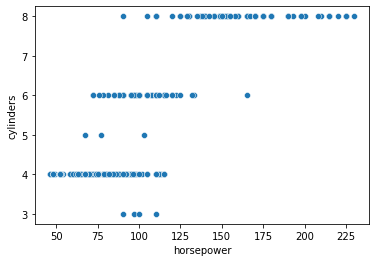

In [49]:
sns.scatterplot(df['horsepower'], df['cylinders'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


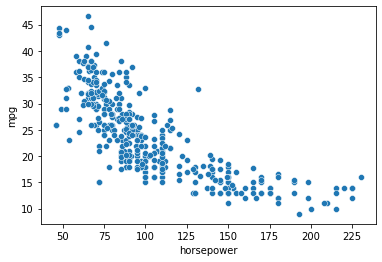

In [50]:
sns.scatterplot(df['horsepower'], df['mpg'])
plt.show()

# Splitting the data into Training and Test

In [51]:
X=df.drop("mpg",axis=1)
Y=df['mpg']

In [52]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [53]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [56]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
258,6,231.0,105.0,3380,15.8,78,1
212,8,350.0,180.0,4380,12.1,76,1
346,4,97.0,67.0,2065,17.8,81,3
71,3,70.0,97.0,2330,13.5,72,3
191,6,225.0,100.0,3233,15.4,76,1


In [57]:
Y_train.head()

258    20.6
212    16.5
346    32.3
71     19.0
191    22.0
Name: mpg, dtype: float64

In [58]:
X_test.head()


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
39,8,400.0,175.0,4464,11.5,71,1
285,8,305.0,130.0,3840,15.4,79,1
164,6,231.0,110.0,3039,15.0,75,1
220,4,85.0,70.0,1945,16.8,77,3
163,6,225.0,95.0,3785,19.0,75,1


Standard scalar

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [61]:
X_train_std

array([[ 0.37363496,  0.42153535,  0.06049357, ...,  0.03181711,
         0.51946626, -0.7593761 ],
       [ 1.55037035,  1.57170955,  1.98784692, ..., -1.2688355 ,
        -0.02797126, -0.7593761 ],
       [-0.80310043, -0.87361879, -0.91603212, ...,  0.73487257,
         1.34062255,  1.70297954],
       ...,
       [ 0.37363496, -0.13905375,  0.18898379, ..., -1.09307164,
         1.34062255, -0.7593761 ],
       [ 1.55037035,  1.47505625,  1.47388602, ..., -2.71009921,
        -1.67028383, -0.7593761 ],
       [-0.80310043, -0.76730016, -0.71044777, ...,  0.38334484,
         1.34062255,  1.70297954]])

In [62]:
X_test_std

array([[ 1.55037035,  2.05497602,  1.85935669,  1.80884975, -1.47975214,
        -1.39656507, -0.7593761 ],
       [ 1.55037035,  1.13676973,  0.70294469,  1.07040588, -0.10879398,
         0.79318502, -0.7593761 ],
       [ 0.37363496,  0.42153535,  0.18898379,  0.12249955, -0.24940508,
        -0.30169002, -0.7593761 ],
       [-0.80310043, -0.98960274, -0.83893799, -1.17214404,  0.38334484,
         0.2457475 ,  1.70297954],
       [ 0.37363496,  0.36354337, -0.19648687,  1.00531868,  1.15670585,
        -0.30169002, -0.7593761 ],
       [ 0.37363496,  0.60517661, -0.63335363,  0.75562051,  1.85976132,
        -0.02797126, -0.7593761 ],
       [-0.80310043, -1.11525202, -0.86463603, -1.56503405,  0.80517812,
        -1.39656507,  1.70297954],
       [ 0.37363496,  0.36354337, -0.06799665,  0.82189111,  0.6997198 ,
         0.2457475 , -0.7593761 ],
       [ 0.37363496,  0.43120068, -0.3249771 ,  0.32486158,  0.52395593,
         0.51946626, -0.7593761 ],
       [-0.80310043, -0.7189

In [63]:
pickle.dump(sc,open('/content/Fuel Efficiency/scaler.pkl','wb'))

Build the Model and Train

In [69]:
len(X_train.keys())

7

In [70]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [71]:
# Initialising the ANN
model= Sequential()

# Adding the input layer
model.add(Dense(units=64,activation='relu',input_shape=[7]))
# model.add(Dense(units=64,activation='relu',input_shape=[len(X_train.keys())]))

# Adding the second hidden layer
model.add(Dense(units=64,activation='relu'))

# Adding the 3rd hidden layer
model.add(Dense(units=64,activation='relu'))

# Adding the output layer
model.add(Dense(units=1))

Compiling the ANN

In [72]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_squared_error','mean_absolute_error'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [74]:
model.fit(X_train_std,Y_train,batch_size=100,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 625.0781 - mean_squared_error: 625.0781 - mean_absolute_error: 23.6699
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 595.3918 - mean_squared_error: 595.3918 - mean_absolute_error: 22.9982
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 592.2559 - mean_squared_error: 592.2559 - mean_absolute_error: 22.8979
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 577.6393 - mean_squared_error: 577.6393 - mean_absolute_error: 22.5813
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 551.5917 - mean_squared_error: 551.5918 - mean_absolute_error: 21.9994
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 531.6158 - mean_squared_error: 531.6158 - mean_absolute_error: 21.5393
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 515.3425 - mean_squared_error: 515.3425 - mean_absolute_error: 21.1083

In [76]:
mae=model.evaluate(X_train_std,Y_train)

9/9 [==============================] - 0s 2ms/step - loss: 1.3016 - mean_squared_error: 1.3016 - mean_absolute_error: 0.6605


In [77]:
model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 9.7162 - mean_squared_error: 9.7162 - mean_absolute_error: 2.1558


[9.716154098510742, 9.716154098510742, 2.1557984352111816]

In [78]:
prediction=model.predict(X_test_std)

In [79]:
# Actual data
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
181    33.0
107    18.0
42     12.0
31     25.0
33     19.0
Name: mpg, Length: 118, dtype: float64

In [80]:
prediction

array([[13.734383 ],
       [18.506311 ],
       [20.147259 ],
       [33.31941  ],
       [16.914402 ],
       [15.896006 ],
       [33.060963 ],
       [19.360323 ],
       [22.705797 ],
       [26.052347 ],
       [23.78652  ],
       [25.723383 ],
       [27.70958  ],
       [37.022083 ],
       [20.764105 ],
       [22.77189  ],
       [13.245882 ],
       [21.794254 ],
       [12.008925 ],
       [17.548176 ],
       [27.28773  ],
       [21.33618  ],
       [18.715456 ],
       [13.724569 ],
       [34.35884  ],
       [28.107601 ],
       [19.744377 ],
       [13.176176 ],
       [21.027246 ],
       [12.651223 ],
       [35.17634  ],
       [36.503765 ],
       [26.14976  ],
       [28.516916 ],
       [31.569777 ],
       [22.158247 ],
       [22.444529 ],
       [17.205133 ],
       [11.1241045],
       [27.904072 ],
       [30.997585 ],
       [22.573095 ],
       [14.554836 ],
       [11.611739 ],
       [13.164774 ],
       [24.40449  ],
       [28.357069 ],
       [17.35

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

In [83]:
rmse

3.117074509247401